In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score , mean_absolute_error

In [ ]:
car_data = pd.read_csv("/content/car data.csv")

In [ ]:
car_data

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [ ]:
car_data.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [ ]:
car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [ ]:
print(car_data["Fuel_Type"].value_counts(),car_data["Seller_Type"].value_counts(),car_data["Transmission"].value_counts())

Fuel_Type
Petrol    239
Diesel     60
CNG         2
Name: count, dtype: int64 Seller_Type
Dealer        195
Individual    106
Name: count, dtype: int64 Transmission
Manual       261
Automatic     40
Name: count, dtype: int64


As the computer cannot understand text messages so the words etrol , diesel , individual and all has to be converted to  1 or 0 s

In [11]:
car_data.replace({'Transmission' : {"Manual" : 0 , "Automatic" : 1 }} , inplace = True)
car_data.replace({'Fuel_Type' : {"Petrol" : 0 , "Diesel" : 1 , "CNG" : 2}} , inplace = True)
car_data.replace({'Seller_Type' : {"Dealer" : 0 , "Individual" : 1}} , inplace = True)

Splitting the data

In [12]:
X = car_data.drop(columns = ["Car_Name" , "Selling_Price"] , axis = 1)
Y = car_data["Selling_Price"]

In [13]:
X_train , X_test , Y_train , Y_test = train_test_split(X,Y,test_size = 0.1 , random_state = 2)

j

In [14]:
linear_model = LinearRegression()
linear_model.fit(X_train , Y_train)

LinearRegression()

Training Accuracy

In [16]:
train_prediction = linear_model.predict(X_train)
print(train_prediction)

[ 3.73088505e+00  5.60702081e+00  7.79779356e+00 -1.88374756e+00
  6.71614572e+00  8.14343296e+00  5.84067525e+00  6.17919527e+00
  6.15863751e+00  1.59459051e+01  2.15385926e+00  1.11618544e+00
 -4.05463414e-01  6.69051516e+00  6.81961414e+00  1.02957394e+00
  6.74306974e+00  1.43864300e+01  3.00001893e+00  7.95149024e+00
 -8.38569413e-01  9.02067892e+00  1.21210550e+00  2.20040027e+00
 -8.23744275e-01  7.52651502e-01  1.00142469e+01 -4.08950275e-01
 -2.40418357e+00  9.99845989e+00  6.81867179e+00  1.09249928e+00
  4.36158792e+00  9.20660480e-02  3.48993776e+00  2.78147834e+00
  1.50401026e+00  4.65736158e-01  1.68679810e+00  1.18722506e+00
  4.32936153e+00  6.09932798e+00  9.51639926e-01  7.52875828e-01
  6.05967594e+00  3.49453005e+00  2.40969246e+00  7.52230513e+00
  4.63113915e+00  4.44239322e+00  4.22460259e+00  2.71077171e+00
  4.46881874e+00  1.76156730e+00  2.86100050e-01  3.95181249e+00
  1.36371845e+00  4.63046605e+00  1.44343122e+00  7.27550233e+00
  7.26488044e+00  6.54659

In [18]:
R_squared = r2_score(Y_train , train_prediction )
Mean_squared = mean_absolute_error(Y_train , train_prediction)
print("R_squared = ",R_squared)
print("Mean Absolute Error = ", Mean_squared)

R_squared =  0.8799451660493711
Mean Absolute Error =  1.2166174093911273


Test Accuracy

In [21]:
test_prediction = linear_model.predict(X_test)
print(test_prediction)

[10.32892855  0.77165673  4.26482324  4.78985002  9.88701568  4.24823193
  6.92536953  7.29321065  0.21950514  5.18527582  6.23823964  6.07761019
  2.1716932   7.77611973  1.89987958  1.79635895  2.10001123  1.91953211
  9.24977006  4.25291486  1.569912    9.04949049  1.52561157  9.65418587
  0.89631315  7.99187626  1.59929505 -3.17680912  4.24653988  2.1257015
  3.49654935]


In [22]:
R_squared_test = r2_score(Y_test , test_prediction )
Mean_squared_test = mean_absolute_error(Y_test , test_prediction)
print("R_squared = ",R_squared_test)
print("Mean Absolute Error = ", Mean_squared_test)

R_squared =  0.8365766715027051
Mean Absolute Error =  1.1516382156613783


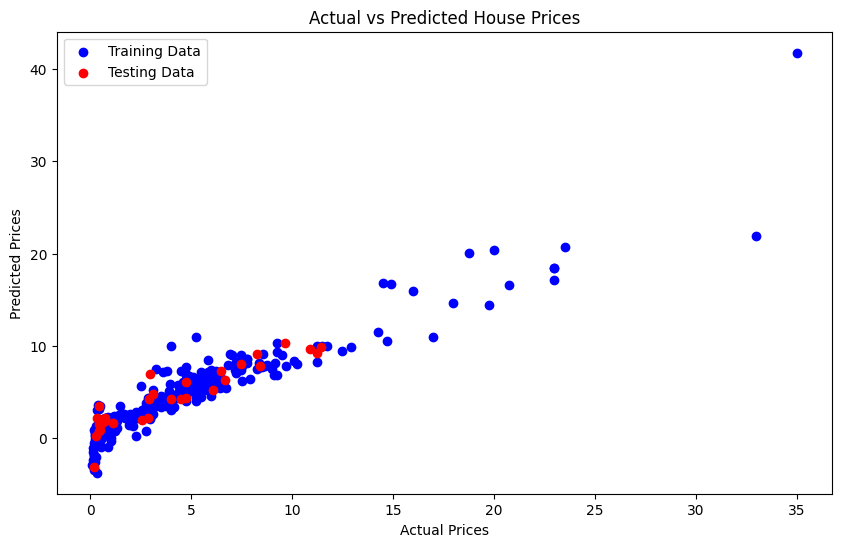

In [23]:
plt.figure(figsize=(10, 6))

# Scatter plot for training data
plt.scatter(Y_train, train_prediction, color='blue', label='Training Data')

# Scatter plot for testing data
plt.scatter(Y_test, test_prediction, color='red', label='Testing Data')


plt.title('Actual vs Predicted House Prices')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.legend()
plt.show()

***Lasso Regression***

In [24]:
lasso_model = Lasso()
lasso_model.fit(X_train , Y_train)

Lasso()

Training Accuracy

In [25]:
train_prediction = lasso_model.predict(X_train)
print(train_prediction)

[ 3.56679076e+00  5.60257564e+00  8.28781371e+00 -8.30814314e-01
  5.27539880e+00  6.50367937e+00  5.73552938e+00  6.41187200e+00
  4.78218845e+00  1.54979701e+01  2.60868685e+00  1.68164537e+00
  4.65587149e-01  5.14260426e+00  6.87569869e+00  1.60372469e+00
  5.30299396e+00  1.39150016e+01  2.86877663e+00  6.44421824e+00
  9.38523430e-02  9.99955865e+00  1.79683394e+00  2.66121014e+00
  2.10269105e-02  1.39327221e+00  1.01152846e+01  4.55985698e-01
 -1.29850564e+00  8.96458834e+00  6.87473286e+00  2.80689227e+00
  4.00679563e+00  8.93707044e-01  3.11243615e+00  2.61344453e+00
  2.13519495e+00  1.21115483e+00  2.20395877e+00  1.77253883e+00
  4.40123646e+00  4.26379158e+00  1.53108120e+00  2.67410546e+00
  4.37186991e+00  2.41613935e+00  2.90706331e+00  6.07491388e+00
  5.02364608e+00  4.39669701e+00  3.59203190e+00  2.67643327e+00
  4.41172590e+00  2.31675779e+00  1.01438277e+00  3.68609748e+00
  1.50265941e+00  5.02295620e+00  2.07310584e+00  6.19074097e+00
  7.81981153e+00  5.36371

In [26]:
R_squared = r2_score(Y_train , train_prediction )
Mean_squared = mean_absolute_error(Y_train , train_prediction)
print("R_squared = ",R_squared)
print("Mean Absolute Error = ", Mean_squared)

R_squared =  0.8427856123435794
Mean Absolute Error =  1.2863097696916528


Test Accuracy

In [27]:
test_prediction = lasso_model.predict(X_test)
print(test_prediction)

[ 9.87888122  1.42396266  4.33267834  3.17313445  8.95590579  4.29397384
  3.73913632  5.66283974  0.91478394  5.25514316  6.47238818  4.39507335
  1.2955156   8.26559961  2.00292338  2.32529219  2.55349653  2.34742172
  7.96895166  4.18441245  2.3369918   7.86598537  2.02308236  8.56734786
  1.55498136  6.48561097  2.11427451 -1.18422036  4.01710445  2.21749695
  2.41820898]


In [28]:
R_squared_test = r2_score(Y_test , test_prediction )
Mean_squared_test = mean_absolute_error(Y_test , test_prediction)
print("R_squared = ",R_squared_test)
print("Mean Absolute Error = ", Mean_squared_test)

R_squared =  0.8709167941173195
Mean Absolute Error =  1.0507413774170433


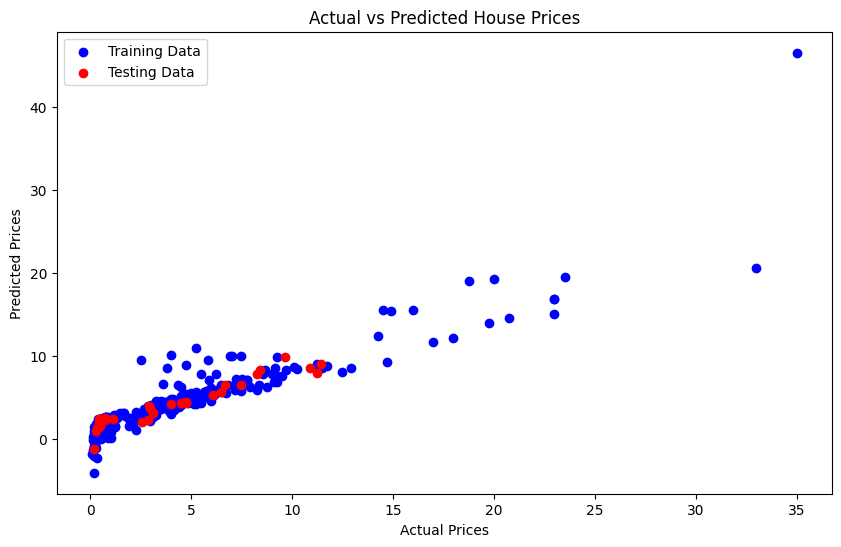

In [29]:
plt.figure(figsize=(10, 6))

# Scatter plot for training data
plt.scatter(Y_train, train_prediction, color='blue', label='Training Data')

# Scatter plot for testing data
plt.scatter(Y_test, test_prediction, color='red', label='Testing Data')


plt.title('Actual vs Predicted House Prices')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.legend()
plt.show()